# WEB API's
- application programming interface
- connect app & database
- specify data with url
- parse data
- API may return data in json format
## JSON
- JavaScript Object Notation
- dictionary like data-structure: key value pairs
- keys are string, value can be anything
- easy to read and write  

when you make an api call, you are sending information and you wait for response. example of api: visit this link https://newsapi.org/ .when you log sign in with your name and password you are sending an api call to for example facebook to check your identity  

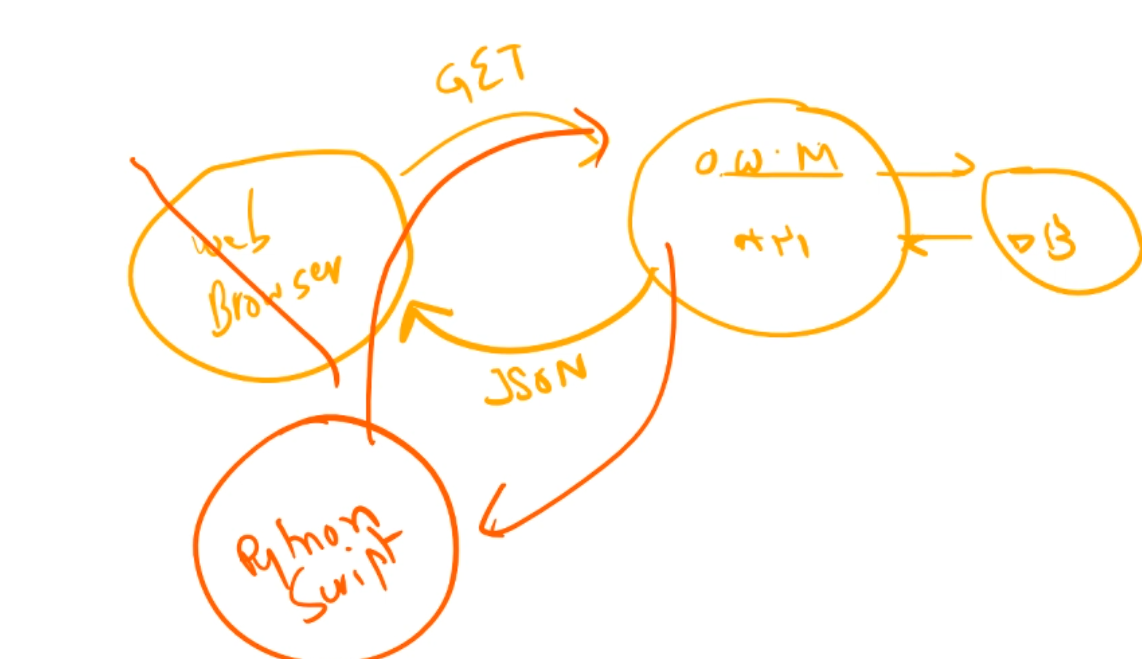

now let's interact with APIs
- use this link https://newsapi.org/ register to get your api and copy the first one as example

In [ ]:
from urllib.request import urlopen

In [ ]:
api_url="https://newsapi.org/v2/everything?q=apple&from=2023-09-28&to=2023-09-28&sortBy=popularity&apiKey=632ca8d1422d4e4b8e12af66e543838f"

In [ ]:
url_result=urlopen(api_url)
print(url_result)   # we get a http response

In [ ]:
#now let's read our data
data=url_result.read()    # stored as a string
print(data)

In [ ]:
# but we have a problem with type
print(type(data))

In [ ]:
#let's parse it and close the connection (parse mean understand the format)
import json
json_data=json.loads(data)   #loads because data is a string
print(json_data)

In [ ]:
print(type(json_data))

In [ ]:
json_data["status"]

## Request Library

this library helps us to write and read data using API

In [24]:
import requests

### facebook api
- just write facebook api and read the documentation

In [25]:
url="http://graph.facebook.com/100091350157241/picture?type=large" # 4 for Mark Zuckerberg founder of facebook

to get your id just do these steps:
- log in to your Facebook account using a web browser.
- Go to your Facebook profile page.
- In the URL of your profile page, you will see a string of numbers at the end. That string of numbers is your Facebook user ID.

For example, if the URL of your profile page is "https://www.facebook.com/profile.php?id=123456789", then "123456789" would be your Facebook user ID.

In [26]:
r=requests.get(url)

In [ ]:
print(r.content) #binary code

In [28]:
with open("image.jpg",'wb') as file: # wb because we are writing a binary code
  file.write(r.content)

### Google Api

we are going to work with api for location

In [33]:
url="http://maps.googleapis.com/maps/api/geocode/json?"

In [38]:
parameters={
    "adress": "casablanca"
}

In [39]:
r=requests.get(url,params=parameters)

In [ ]:
r.url   # requests library helps you to add parameters

In [ ]:
r.content   #

you have to register in google map and then it gives some credit, then you can use key as parameters

let's say you key is 1000
- parameters={
  "adress":"casablanca",  "key": 1000
}
- r=requests.get(url,params=parameters)
- r.content.decode(UTF-8) # to get json code


### web scraping using requests

In [81]:
url="https://www.values.com/inspirational-quotes?page=2"

In [82]:
r=requests.get(url)

In [83]:
import bs4
from bs4 import BeautifulSoup as soup

In [84]:
data=soup(r.content)

In [ ]:
data # go to inspect and analyse

In [ ]:
data_list=data.findAll("img")[3:-2]
data_list

In [ ]:
data1=data_list[5].attrs['src']   # attrs makes the code dictionary based on tags
print(data1)

In [66]:
with open("inspiration.jpg",'wb') as file:
  url=data_list[5].attrs['src']
  r=requests.get(url)
  file.write(r.content)

In [87]:
for i,article in enumerate(data_list[2:-2]):
  with open(f"inspiration{i}.jpg",'wb') as file:
    url=data_list[i].attrs['src']
    r=requests.get(url)
    file.write(r.content)